![](_fig/labeled.jpg)

# Studio 2: How to Work with Data in Python
In this studio you will learn the basics of what computer code is and how best to think about learning to write code in the Python Programming Language. You will also learn how to test whether two quantitative variables have a statistically significant association.<br>
<br>
Each *Python for Healthcare* studio has six sections:
1. **Objectives**
2. **Readings and Videos**
3. **Discussion**
4. **Analysis**
5. **Conclusion**
6. **Reflection**

Refer to the video below to learn how to use the *Python for Healthcare* studios.

["How to use Py4HC Notebooks"](https://www.youtube.com/watch?v=5fzBGgflXk8&t=4s)  

---

## Objectives
By the end of this course, our goal is for you to learn how to start using the Python Programming Language in health science applications. This includes:

- Understanding how computer code allows humans to talk to computers
- Learning the concrete process for using computer code and Python
- Becoming familiar with the process of writing in Python
- Identify healthcare questions that can be answered with open source data science tools
- Experience how Python can be used to answer questions related to healthcare
- Increase awareness of how Python can be used in a future career in healthcare

Keep these goals in mind as you go through the studios and the course. If you dont understand every part, that is ok. Use these resources to get familair with the concepts.


## Videos
Before starting the **Discussion**, watch the following:

["How to Talk to Computers: Part 2"](https://www.youtube.com/watch?v=sw6bWACGybo)   
["What is the Point of Statistical Inference?": Causal Inference Bootcamp](https://www.youtube.com/watch?v=3IOzq0hOttY) 

## Discussion
After completing the readings and videos above, answer the following questions with your team. 

1. There are a handful of different programs you can use to run and write code. What experience have you had with programs like these? What was that experience like for you?
2. In the videos and readings, you can see that Data Science invovles both statistics and programming. What do you feel more comfortable with and why? What makes each practice easier to learn for you?
3. Statistical tests allow for us to provide evidence from the data for big important questions. What are the big questions you would like to answer?

Be sure that everyone answers each question and responds to at least one answer from another team member. 

## Analysis
In each module, you will complete a live data analysis with your team. The goal of the studio is to give you hands on experience writing Python code and using Data Science tools that are important for health science.<br>
<br>
In each **Analysis** section, there are four steps:
1. Setup Workspace
2. Process Data
3. Create Model
4. Display Results

Within each step of the **Analysis** a header will provide general details about what the lines of code below are used to do.<br>
<br>
As you complete the **Analysis** component of the studio, follow this video below to understand each of the steps in the code.

["Notebook 2: Multiple Regression"](https://www.youtube.com/watch?v=5fzBGgflXk8&t=4s)

### Step 1: Setup Workspace
In the first step, you will assemble libraries, set your working directory, and import data. You will do this same process before every analysis. This is just like setting up your brushes, canvas, and easel for paiting or putting your tools, parts, and bike in the repair stand.

#### Import Standard Libraries
These libraries are imported for every data science related Python script.

In [2]:
import os
import pandas as pd
import numpy as np

#### Import Specific Libraries
These libraries are used for specific components of the script.

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Set Working Directory
This is the location of the folder on your device that holds all of your files. Once you set this, any file can be accessed by the relative location. 

In [7]:
os.chdir("/home/drewc/GitHub/allocativ/py4hc/Equity/Studio2")

#### Import Data
In order to use data, you will often import from a `".csv"` file located in your directory and save it with a useful name. After importing, you can use `.info()` and `.head()` to quicky view the data. 

In [8]:
df_doh = pd.read_csv("_data/doh.csv")

In [9]:
df_doh.info()
df_doh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ZCTA            970 non-null    object 
 1   PERCENT_TOTAL   970 non-null    float64
 2   POPULATION      970 non-null    int64  
 3   A00_B99_R1000   970 non-null    float64
 4   Benign_R1000    970 non-null    float64
 5   D50_D64_R1000   970 non-null    float64
 6   E00_E99_R1000   970 non-null    float64
 7   G00_G99_R1000   970 non-null    float64
 8   J00_J99_R1000   970 non-null    float64
 9   K00_K99_R1000   970 non-null    float64
 10  N00_N99_R1000   970 non-null    float64
 11  O00_O07_R1000   970 non-null    float64
 12  O10_O99_R1000   970 non-null    float64
 13  P00_P99_R1000   970 non-null    float64
 14  Q00_Q99_R1000   970 non-null    float64
 15  Abnormal_R1000  970 non-null    float64
 16  Residual_R1000  970 non-null    float64
 17  V01_Y89_R1000   970 non-null    flo

,ZCTA,PERCENT_TOTAL,POPULATION,A00_B99_R1000,Benign_R1000,D50_D64_R1000,E00_E99_R1000,G00_G99_R1000,J00_J99_R1000,K00_K99_R1000,N00_N99_R1000,O00_O07_R1000,O10_O99_R1000,P00_P99_R1000,Q00_Q99_R1000,Abnormal_R1000,Residual_R1000,V01_Y89_R1000,SIDS_R1000
0,ZCTA32830,2.430000e-07,5,0.00,0.0,0.0,0.00,0.0,0.00,200.00,0.0,0.0,0.0,0.0,0.0,0.00,200.00,0.00,0.0
1,ZCTA34141,3.255000e-06,67,0.00,0.0,0.0,14.93,0.0,0.00,29.85,0.0,0.0,0.0,0.0,0.0,29.85,14.93,179.10,0.0
2,ZCTA32356,4.420000e-06,91,0.00,0.0,0.0,10.99,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
3,ZCTA34679,5.003000e-06,103,0.00,0.0,0.0,0.00,0.0,29.13,0.00,0.0,0.0,0.0,0.0,0.0,0.00,9.71,19.42,0.0
4,ZCTA33122,5.295000e-06,109,9.17,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,9.17,18.35,0.0


In [10]:
df_acs = pd.read_csv("_data/acs.csv")

In [11]:
df_acs.info()
df_acs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32829 entries, 0 to 32828
Columns: 478 entries, FIPS to DP05_0031PE
dtypes: float64(427), int64(48), object(3)
memory usage: 119.7+ MB


,FIPS,ZCTA,ST,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,...,DP05_0021PE,DP05_0022PE,DP05_0023PE,DP05_0024PE,DP05_0025PE,DP05_0026PE,DP05_0027PE,DP05_0029PE,DP05_0030PE,DP05_0031PE
0,FIPS01001,ZCTA36003,AL,913,59.9,12.8,44.4,11.3,2.4,1.0,...,89.4,83.6,27.1,23.0,1696,44.6,55.4,436,54.1,45.9
1,FIPS01001,ZCTA36067,AL,10351,72.7,30.8,55.7,22.5,3.4,1.2,...,75.0,69.9,16.9,14.0,21545,47.3,52.7,4026,43.2,56.8
2,FIPS01001,ZCTA36066,AL,7950,68.3,34.9,53.7,26.5,4.7,2.7,...,75.1,73.7,17.0,15.1,14339,48.1,51.9,2878,42.9,57.1
3,FIPS01001,ZCTA36006,AL,423,58.4,15.1,45.6,12.3,4.3,0.0,...,91.2,85.9,30.6,24.9,833,44.8,55.2,227,37.0,63.0
4,FIPS01001,ZCTA36051,AL,832,74.8,30.5,58.7,18.4,2.2,0.0,...,79.4,76.2,16.0,11.8,1672,51.6,48.4,249,36.1,63.9


### Step 2: Process Data
In the second step, you will modfiy the data frames that you imported in order to get them ready for whatever model you wish to create. You will need to make sure the data is correctly subset or joined, uses the correct shape and type, and has missing values resolved. This is just like kneading clay to remove air bubbles or cleaning the bike before you install new parts. 

#### Join DataFrames
This will join two pandas DataFrames along a column they both share with an identical name and data type. For common options:<br>
`how = "inner"` Keeps rows that appear in both<br>
`how = "outer"` Keeps every row from both<br>
`how = "left"` Keeps every row from the first, and assigns any row from the left (including duplicates).<br>

In [12]:
df_zip = pd.merge(df_doh, df_acs, on = "ZCTA", how = "inner")

#### Filter DataFrame
This will remove all columns except those specified.

In [13]:
df_zip = df_zip.filter(["E00_E99_R1000",
                        "DP02_0071PE",
                        "DP02_0012PE",
                        "DP03_0009PE",
                        "DP02_0064PE",
                        "DP05_0077PE"])

#### Rename Columns
This will rename selected columns except those specified.

In [14]:
df_zip = df_zip.rename(columns = {"E00_E99_R1000": "Diabetes Mortality",
                                  "DP02_0071PE": "With Disability",
                                  "DP02_0012PE": "Over 65",
                                  "DP03_0009PE": "Unemployment Rate",
                                  "DP02_0064PE": "With College Degree",
                                  "DP05_0077PE": "Non-Hispanic White"})

#### Drop NA Values
This will drop all rows that have a missing value.

In [15]:
df_zip = df_zip.dropna()

#### Verify
At the end of each step, use ".info()" and ".head()" to quicky view the data.

In [16]:
df_zip.info()
df_zip.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 0 to 962
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diabetes Mortality   954 non-null    float64
 1   With Disability      954 non-null    float64
 2   Over 65              954 non-null    float64
 3   Unemployment Rate    954 non-null    float64
 4   With College Degree  954 non-null    float64
 5   Non-Hispanic White   954 non-null    float64
dtypes: float64(6)
memory usage: 52.2 KB


,Diabetes Mortality,With Disability,Over 65,Unemployment Rate,With College Degree,Non-Hispanic White
0,0.00,0.0,0.0,0.0,0.0,0.0
1,14.93,0.0,0.0,11.1,11.1,61.2
3,0.00,5.8,32.1,0.0,7.0,100.0
4,0.00,0.0,0.0,0.0,50.7,19.3
5,8.13,17.9,66.7,0.0,0.0,95.1


### Step 3: Create Model
In this step you will create a model that provides meaningful information about the data. This can include a statistical test, a machine learning algorithm, or a neural network. This is similar to drawing a still life or writing a poem. 


#### Multiple Linear Regression
This statistical test creates a model that shows the effect of multiple quantitative predictors on a quantitative outcome using "Ordinary Least Squares" regression. Individual predictors can be compared using the coefficients and the p-values. The overall model can be evaluated with an adjusted R-squared and the F-statistic. 

In [17]:
x = df_zip.drop(columns = ["Diabetes Mortality"])
y = df_zip["Diabetes Mortality"]
MLR = sm.OLS(y, x).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Diabetes Mortality   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              695.1
Date:                Fri, 04 Sep 2020   Prob (F-statistic):                   3.08e-314
Time:                        19:35:43   Log-Likelihood:                         -1282.5
No. Observations:                 954   AIC:                                      2575.
Df Residuals:                     949   BIC:                                      2599.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
With Disability         0.0692      0.007     10.487      0.000       0.056       0.082
Over 65                 0.0503      0.005      9.807      0.000       0.040       0.060
Unemployment Rate       0.0339      0.006      5.416      0.000       0.022       0.046
With College Degree    -0.0156      0.003     -5.075      0.000      -0.022      -0.010
Non-Hispanic White     -0.0001      0.001     -0.100      0.921      -0.003       0.003
==============================================================================
Omnibus:                     1048.769   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192041.043
Skew:                           4.912   Prob(JB):                         0.00
Kurtosis:                      71.809   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 4: Display Results
In this step you will create an informative visual that displays the results for others to see. This is similar to framing your finished painting or posting an image to social media with an informative caption. 

#### Scatterplot
This displays two quantitative variables with dots corresponding to each observation. This is commonly used for displaying correlation tests. 

Text(0, 0.5, 'Diabetes Mortality')

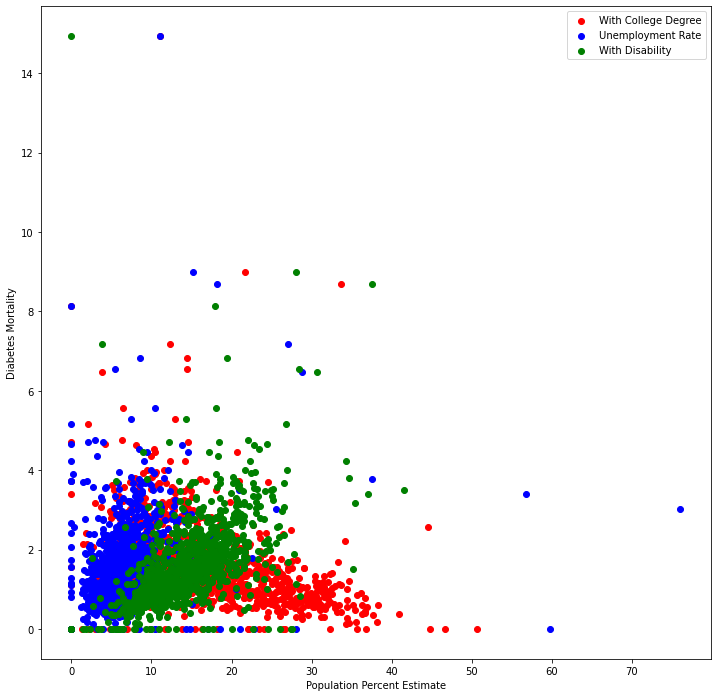

In [19]:
plt.figure(figsize = (12, 12))
plt.scatter(x["With College Degree"], y, c = "r")
plt.scatter(x["Unemployment Rate"], y, c = "b")
plt.scatter(x["With Disability"], y, c = "g")
plt.legend(["With College Degree", "Unemployment Rate", "With Disability"])
plt.xlabel("Population Percent Estimate")
plt.ylabel("Diabetes Mortality")

## Conclusion
In your own words write the following:

1. This topic is important because...

Identify two peer reviewed scientific articles that have findings related to your first statement. Then write the following:

2. Other studies have found that...

Using the results of the analysis above, craft a simple conclusion with the following items:

3. It was hypothesized that...
4. Data was collected from...
5. The study found that...
6. This provides evidence that...

After writing each of these statements, assemble them into a paragraph in the shown order. Then do the following:

- Edit the paragraph to be coherent
- Provide a simple title
- Add references in an appropirate style

Now you have an abstract!

## Reflection
After completing the studio session please pick one or two of the following questions to discuss with your team. 

1. What was something new that you learned in this module?
2. What was something that you knew previously but heard differently in this module?
3. What was something that understand better after this module?
4. What was something that is confusing after this module?

Each team member may select a different question, but be sure that everyone provides a refelction and responds to another's reflection.